**Importing Libraries and Loading Data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('DoctorVisits-DA.csv')

**1. Number of Duplicates in the Dataset**

In [2]:
duplicates = data.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

Number of Duplicates: 0


**2. Total Number of People by Count of Illness**

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64


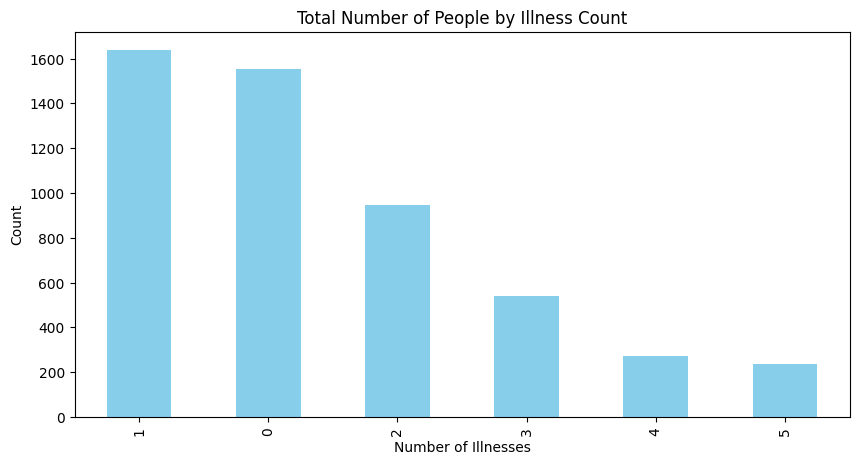

In [3]:
illness_count = data['illness'].value_counts()
print(illness_count)

plt.figure(figsize=(10, 5))
illness_count.plot(kind='bar', color='skyblue')
plt.title('Total Number of People by Illness Count')
plt.xlabel('Number of Illnesses')
plt.ylabel('Count')
plt.show()

**3. Gender-wise Illness**

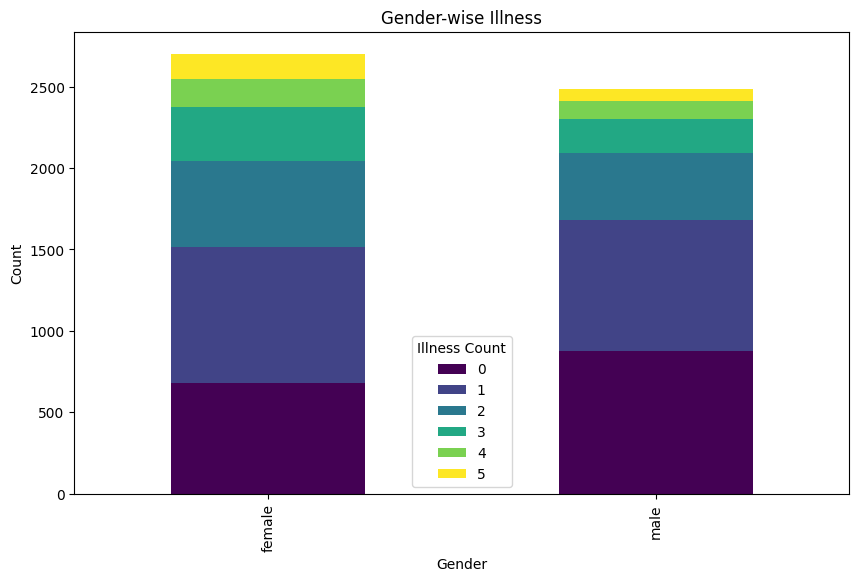

In [4]:
gender_illness = data.groupby(['gender', 'illness']).size().unstack()
gender_illness.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Gender-wise Illness')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Illness Count')
plt.show()

**4. Maximum, Minimum, and Median Income**

In [5]:
max_income = data['income'].max()
min_income = data['income'].min()
median_income = data['income'].median()
print(f"Maximum Income: {max_income}")
print(f"Minimum Income: {min_income}")
print(f"Median Income: {median_income}")


Maximum Income: 1.5
Minimum Income: 0.0
Median Income: 0.55


**5. Days of Reduced Activity by Gender due to Illness**

gender
female    2636
male      1837
Name: reduced, dtype: int64


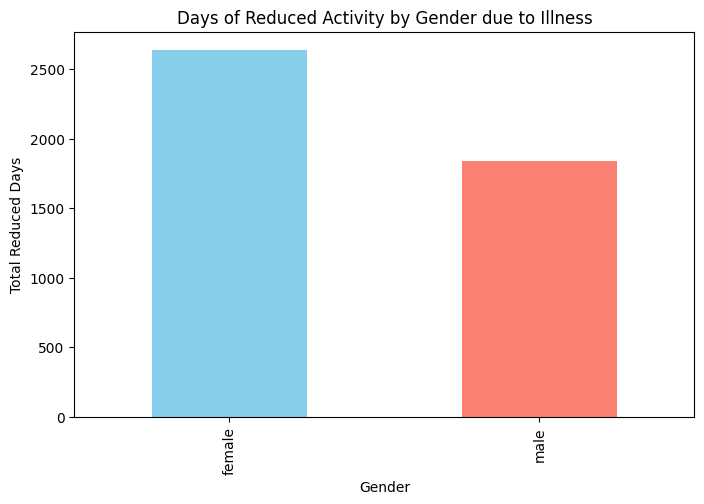

In [6]:
reduced_activity = data.groupby('gender')['reduced'].sum()
print(reduced_activity)

reduced_activity.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 5))
plt.title('Days of Reduced Activity by Gender due to Illness')
plt.xlabel('Gender')
plt.ylabel('Total Reduced Days')
plt.show()


**6. Missing Values Heatmap**

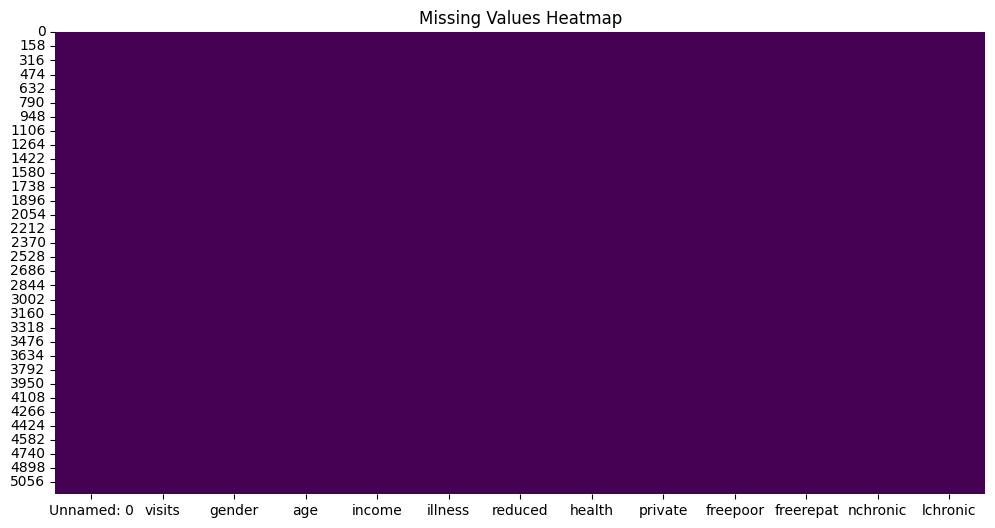

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


**7. Correlation Between Variables**

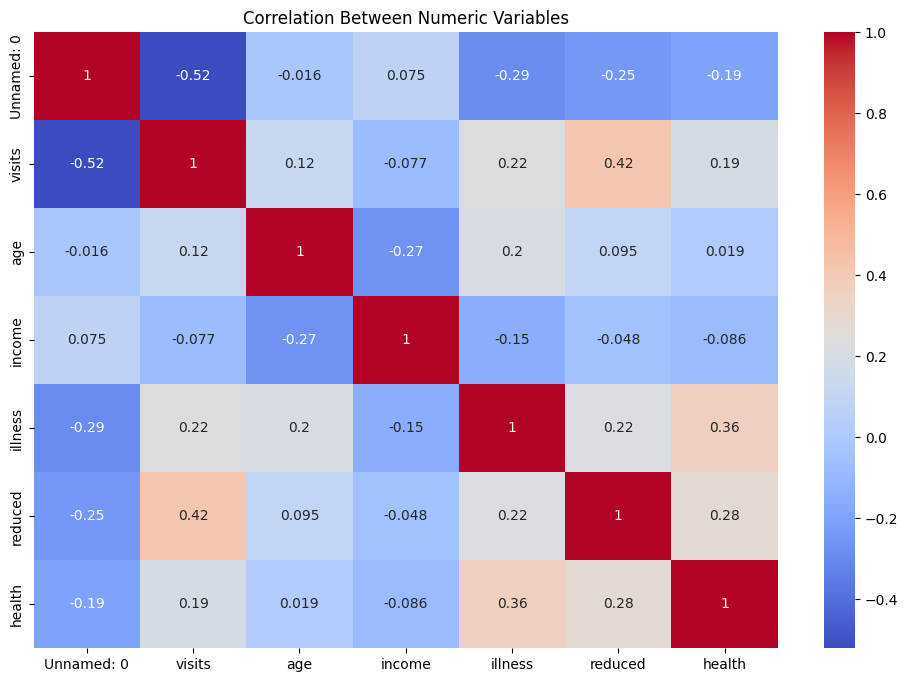

In [14]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Variables')
plt.show()


**8. Income Effect on Hospital Visits**

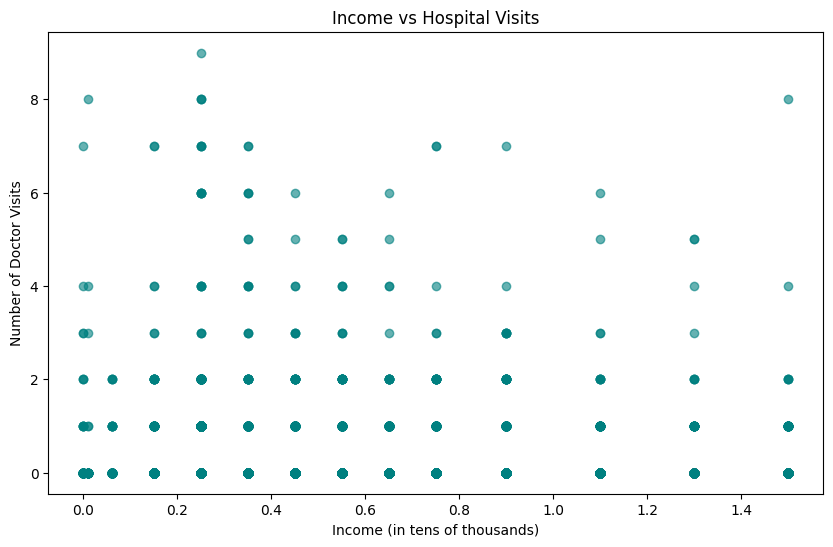

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['income'], data['visits'], alpha=0.6, color='teal')
plt.title('Income vs Hospital Visits')
plt.xlabel('Income (in tens of thousands)')
plt.ylabel('Number of Doctor Visits')
plt.show()


**9. Number of Males and Females Affected by Illness**

gender
female    2023
male      1613
Name: count, dtype: int64


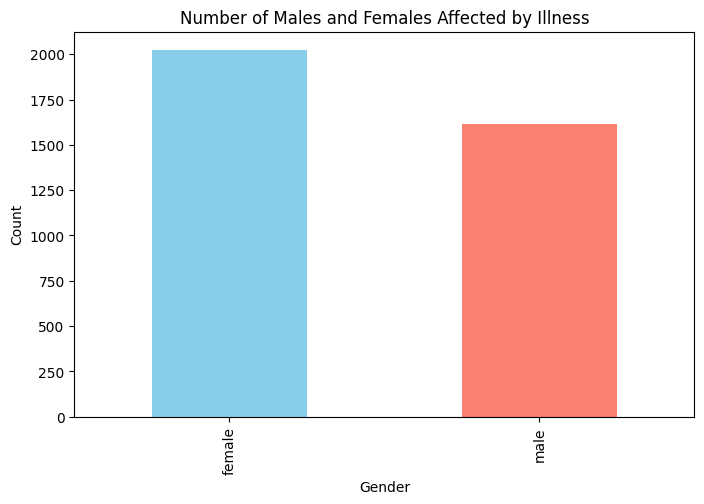

In [10]:
illness_by_gender = data[data['illness'] > 0]['gender'].value_counts()
print(illness_by_gender)

illness_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 5))
plt.title('Number of Males and Females Affected by Illness')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**10.  Percentage of People with Govt. and Private Health Insurance**

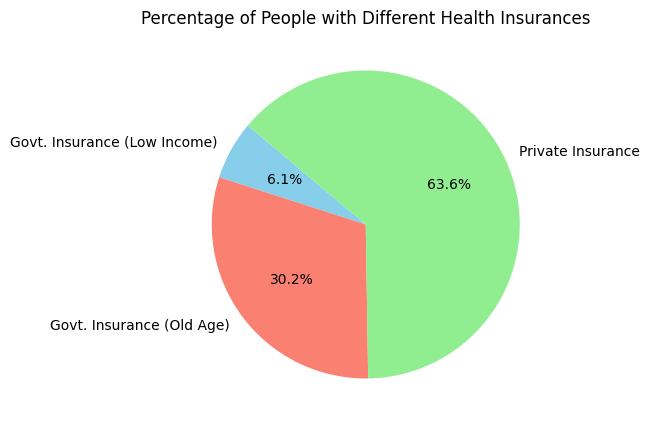

In [11]:
freepoor_pct = (data['freepoor'].value_counts(normalize=True) * 100).get('yes', 0)
freerepat_pct = (data['freerepat'].value_counts(normalize=True) * 100).get('yes', 0)
private_pct = (data['private'].value_counts(normalize=True) * 100).get('yes', 0)

labels = ['Govt. Insurance (Low Income)', 'Govt. Insurance (Old Age)', 'Private Insurance']
sizes = [freepoor_pct, freerepat_pct, private_pct]
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Percentage of People with Different Health Insurances')
plt.show()


**11. Reduced Days of Activity by Gender due to Illness (Bar Chart)**

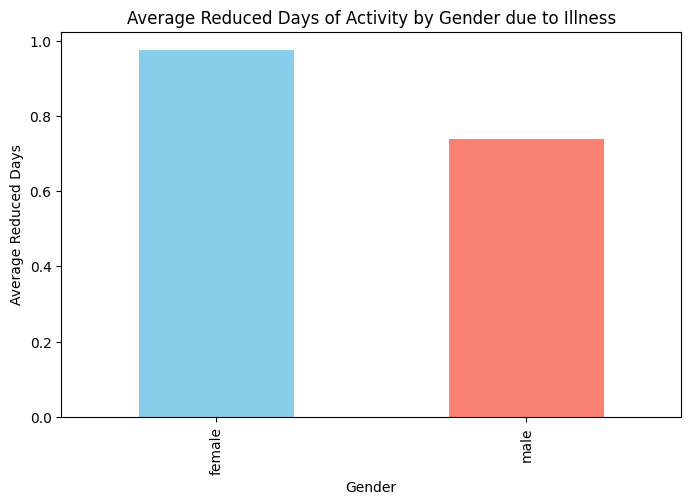

In [12]:
reduced_days_gender = data.groupby('gender')['reduced'].mean()
reduced_days_gender.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 5))
plt.title('Average Reduced Days of Activity by Gender due to Illness')
plt.xlabel('Gender')
plt.ylabel('Average Reduced Days')
plt.show()


**12. Relation Between Health Status and Activity Reduction (Heatmap)**

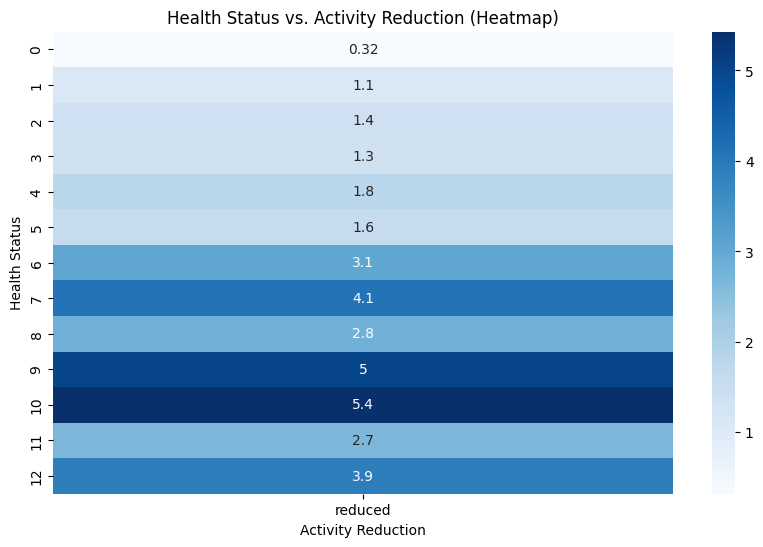

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.pivot_table(index='health', values='reduced', aggfunc='mean').sort_index(), cmap='Blues', annot=True)
plt.title('Health Status vs. Activity Reduction (Heatmap)')
plt.xlabel('Activity Reduction')
plt.ylabel('Health Status')
plt.show()
